In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random as r

In [18]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

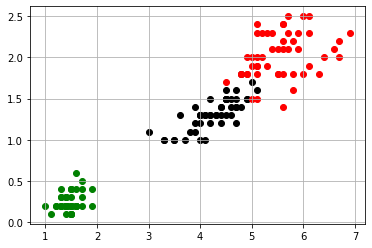

In [21]:
petal_length = list(df['petal_length'])
petal_width = list(df['petal_width'])
species = list(df['species'])

setosa = df.loc[ df['species']== 'setosa']
versicolor = df.loc[ df['species']== 'versicolor']
virginica = df.loc[ df['species']== 'virginica']

plt.scatter(setosa['petal_length'], setosa['petal_width'], color='green')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], color='black')
plt.scatter(virginica['petal_length'], virginica['petal_width'], color='red')

plt.grid()
plt.show()

In [25]:
# petal_length  would be x
# petal_width would be y
# dwa neurony bipolarne pozytywne

class Irysy:
    ekstencja = list()
    def __init__(self, petal_length, petal_width, species, oczekiwana1, oczekiwana2):
        self.petal_length = petal_length
        self.petal_width = petal_width
        self.species = species
        self.oczekiwana1 = oczekiwana1
        self.oczekiwana2 = oczekiwana2
        Irysy.ekstencja.append(self)
        
    @classmethod
    def import_data(cls, petal_length, petal_width, species):
        for i in range(len(species)):
            if species[i] == 'setosa':
                Irysy(petal_length[i], petal_width[i], species[i], 1,1)
            if species[i] == 'versicolor':
                Irysy(petal_length[i], petal_width[i], species[i], 1,-1)
            if species[i] == 'virginica':
                Irysy(petal_length[i], petal_width[i], species[i], -1,-1)
        
    def __str__(self):
        return f'petal_length: {self.petal_length}, petal_width: {self.petal_width}, species: {self.species}, ocz1: {self.oczekiwana1}, ocz2: {self.oczekiwana2}'

Irysy.import_data(petal_length, petal_width, species)
for obs in Irysy.ekstencja[:5]:
    print(obs)
    
class Neuron:
    def __init__(self, rodzaj_neuronu, nastawienie_pozytywne):
        self.w1 = r.randint(-2,2)
        self.w2 = r.randint(-2, 2)
        self.w3 = r.randint(-2,2)
        self.rodzaj_neuronu = rodzaj_neuronu
        self.nastawienie_pozytywne = nastawienie_pozytywne
        self.tempo_uczenia = 1
 
    def zaladuj_dana(self, obserwacja):
        self.bierzaca_dana = obserwacja
 
    def oblicz_NET(self):
        self.net = self.w1 * self.bierzaca_dana.petal_length + self.w2 * self.bierzaca_dana.petal_width + self.w3 * 1
 
    def oblicz_decyzja(self):
        if self.rodzaj_neuronu == 'bi':
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
        else:
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
 
    def korekta_wag(self, oczekiwana):
        if oczekiwana == 1:
            self.w1 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * self.bierzaca_dana.petal_length
            self.w2 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * self.bierzaca_dana.petal_width
            self.w3 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * 1
        if oczekiwana == 2:
            self.w1 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * self.bierzaca_dana.petal_length
            self.w2 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * self.bierzaca_dana.petal_width
            self.w3 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * 1
 
    def __str__(self):
        return f'W1: {self.w1}, W2: {self.w2}, W3: {self.w3}'


    
B1 = Neuron('bi', True)
B2 = Neuron('bi', True)

klasyfikacja = 1
while klasyfikacja:
    klasyfikacja = 0
    for obs in Irysy.ekstencja:
        B1.zaladuj_dana(obs)
        B1.oblicz_NET()
        B1.oblicz_decyzja()
        B2.zaladuj_dana(obs)
        B2.oblicz_NET()
        B2.oblicz_decyzja()
        
        while B1.decyzja != obs.oczekiwana1 or B2.decyzja != obs.oczekiwana2:
            klasyfikacja += 1
            B1.korekta_wag(1)
            B1.oblicz_NET()
            B1.oblicz_decyzja()
            B2.korekta_wag(2)
            B2.oblicz_NET()
            B2.oblicz_decyzja()
            
                
print('wagi')   
print('B1 wagi ', B1)
print('B2 wagi ', B2)

petal_length: 1.4, petal_width: 0.2, species: setosa, ocz1: 1, ocz2: 1
petal_length: 1.4, petal_width: 0.2, species: setosa, ocz1: 1, ocz2: 1
petal_length: 1.3, petal_width: 0.2, species: setosa, ocz1: 1, ocz2: 1
petal_length: 1.5, petal_width: 0.2, species: setosa, ocz1: 1, ocz2: 1
petal_length: 1.4, petal_width: 0.2, species: setosa, ocz1: 1, ocz2: 1


KeyboardInterrupt: 

In [ ]:
# array(['setosa', 'versicolor', 'virginica'], dtype=object)
dane = {'setosa':[], 'versicolor':[], 'virginica':[]}

for obs in Irysy.ekstencja:
    if obs.oczekiwana1 == 1 and obs.oczekiwana2 == 1:
        dane['setosa'].append([obs., obs.petal_width])
    if obs.oczekiwana1 == 1 and obs.oczekiwana2 == -1:
        dane['versicolor'].append([obs.petal_length, obs.petal_width])
    if obs.oczekiwana1 == -1 and obs.oczekiwana2 == -1:
        dane['virginica'].append([obs.petal_length, obs.petal_width])

plt.scatter([ x[0] for x in dane['setosa']], [ y[1] for y in dane['setosa']], color='green')
plt.scatter([ x[0] for x in dane['versicolor']], [ y[1] for y in dane['versicolor']], color='black')
plt.scatter([ x[0] for x in dane['virginica']], [ y[1] for y in dane['virginica']], color='red')



plt.grid()
plt.show()

In [ ]:
dane

In [ ]:
for obs in Irysy.ekstencja:
    print(obs)